# Wafer Fault Detection : An Advanced Level Machine Learning Project

**Brief:** In electronics, a wafer (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer.

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

**Problem Statement**
* Data: Wafers data

Problem Statement: Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

In [1]:
## import required libraries
import pandas as pd 
import numpy as np 

import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Data Ingestion Step
file_path=r'D:\MLProjects\WaferFaultPrediction\notebooks\wafer_23012020_041211.csv'
df=pd.read_csv(file_path)

In [3]:
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [4]:
df.shape

(100, 592)

In [5]:
df.size

59200

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [7]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [8]:
## Train Test Split

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.20, random_state=42)

In [9]:
train_data.shape

(80, 592)

In [10]:
train_data.size

47360

In [11]:
train_data['Good/Bad'].value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

We can see that the data is heavily imbalanced, We need to resample the data.

## Analyze Missing Data

In [12]:
df['Good/Bad'].isnull().sum()

0

No missing values in the data

In [13]:
## Checking missing data in dependent features
train_data.isna().sum().sum() / (train_data.shape[0] * train_data.shape[1]-1 )

0.03847209611689436

Almost 4% of the cells we are Missing. We will need to implement strategies such as mean, median, mode in order to fill those missing values

In [14]:
train_data.drop('Unnamed: 0',axis=1,inplace=True)

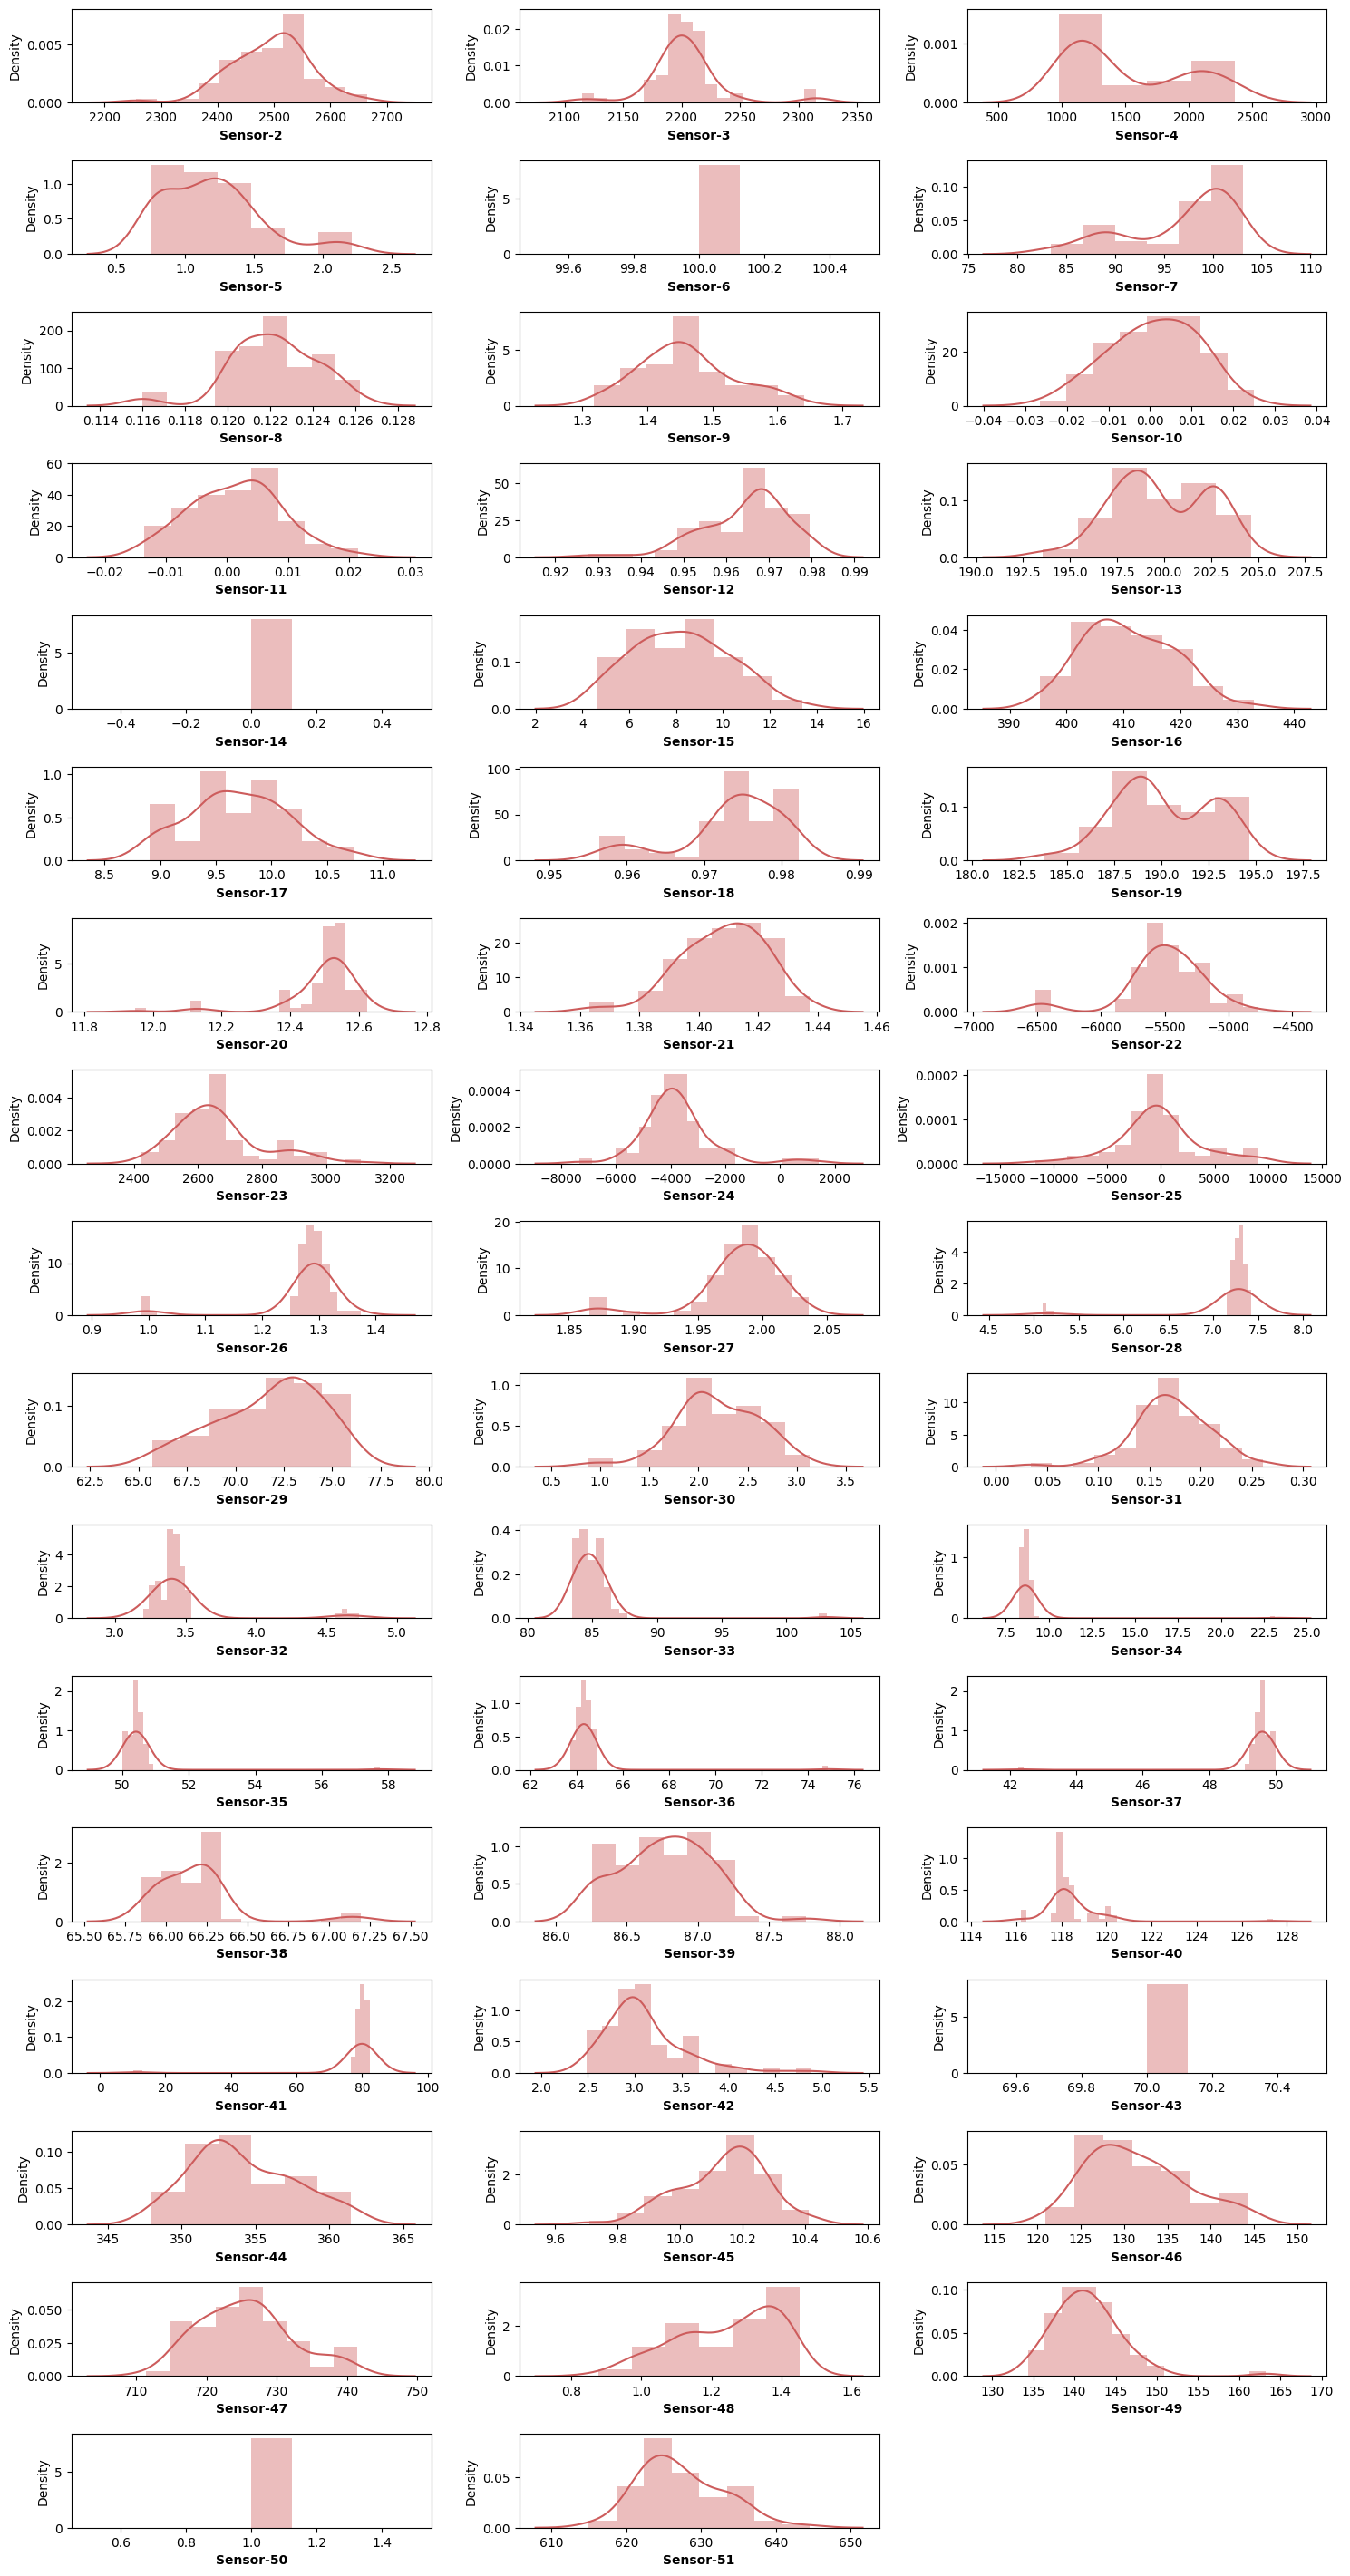

In [15]:
# let's have a look at the distribution first 50 sensors of Wafers

plt.figure(figsize=(15, 100))

for i, col in enumerate(train_data.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=train_data[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()


In [16]:
## Select random 50 sensors
random_50_idx=[]
for i in range(50):
    if i not in random_50_idx:
        random_50_idx.append(np.random.randint(1,591))


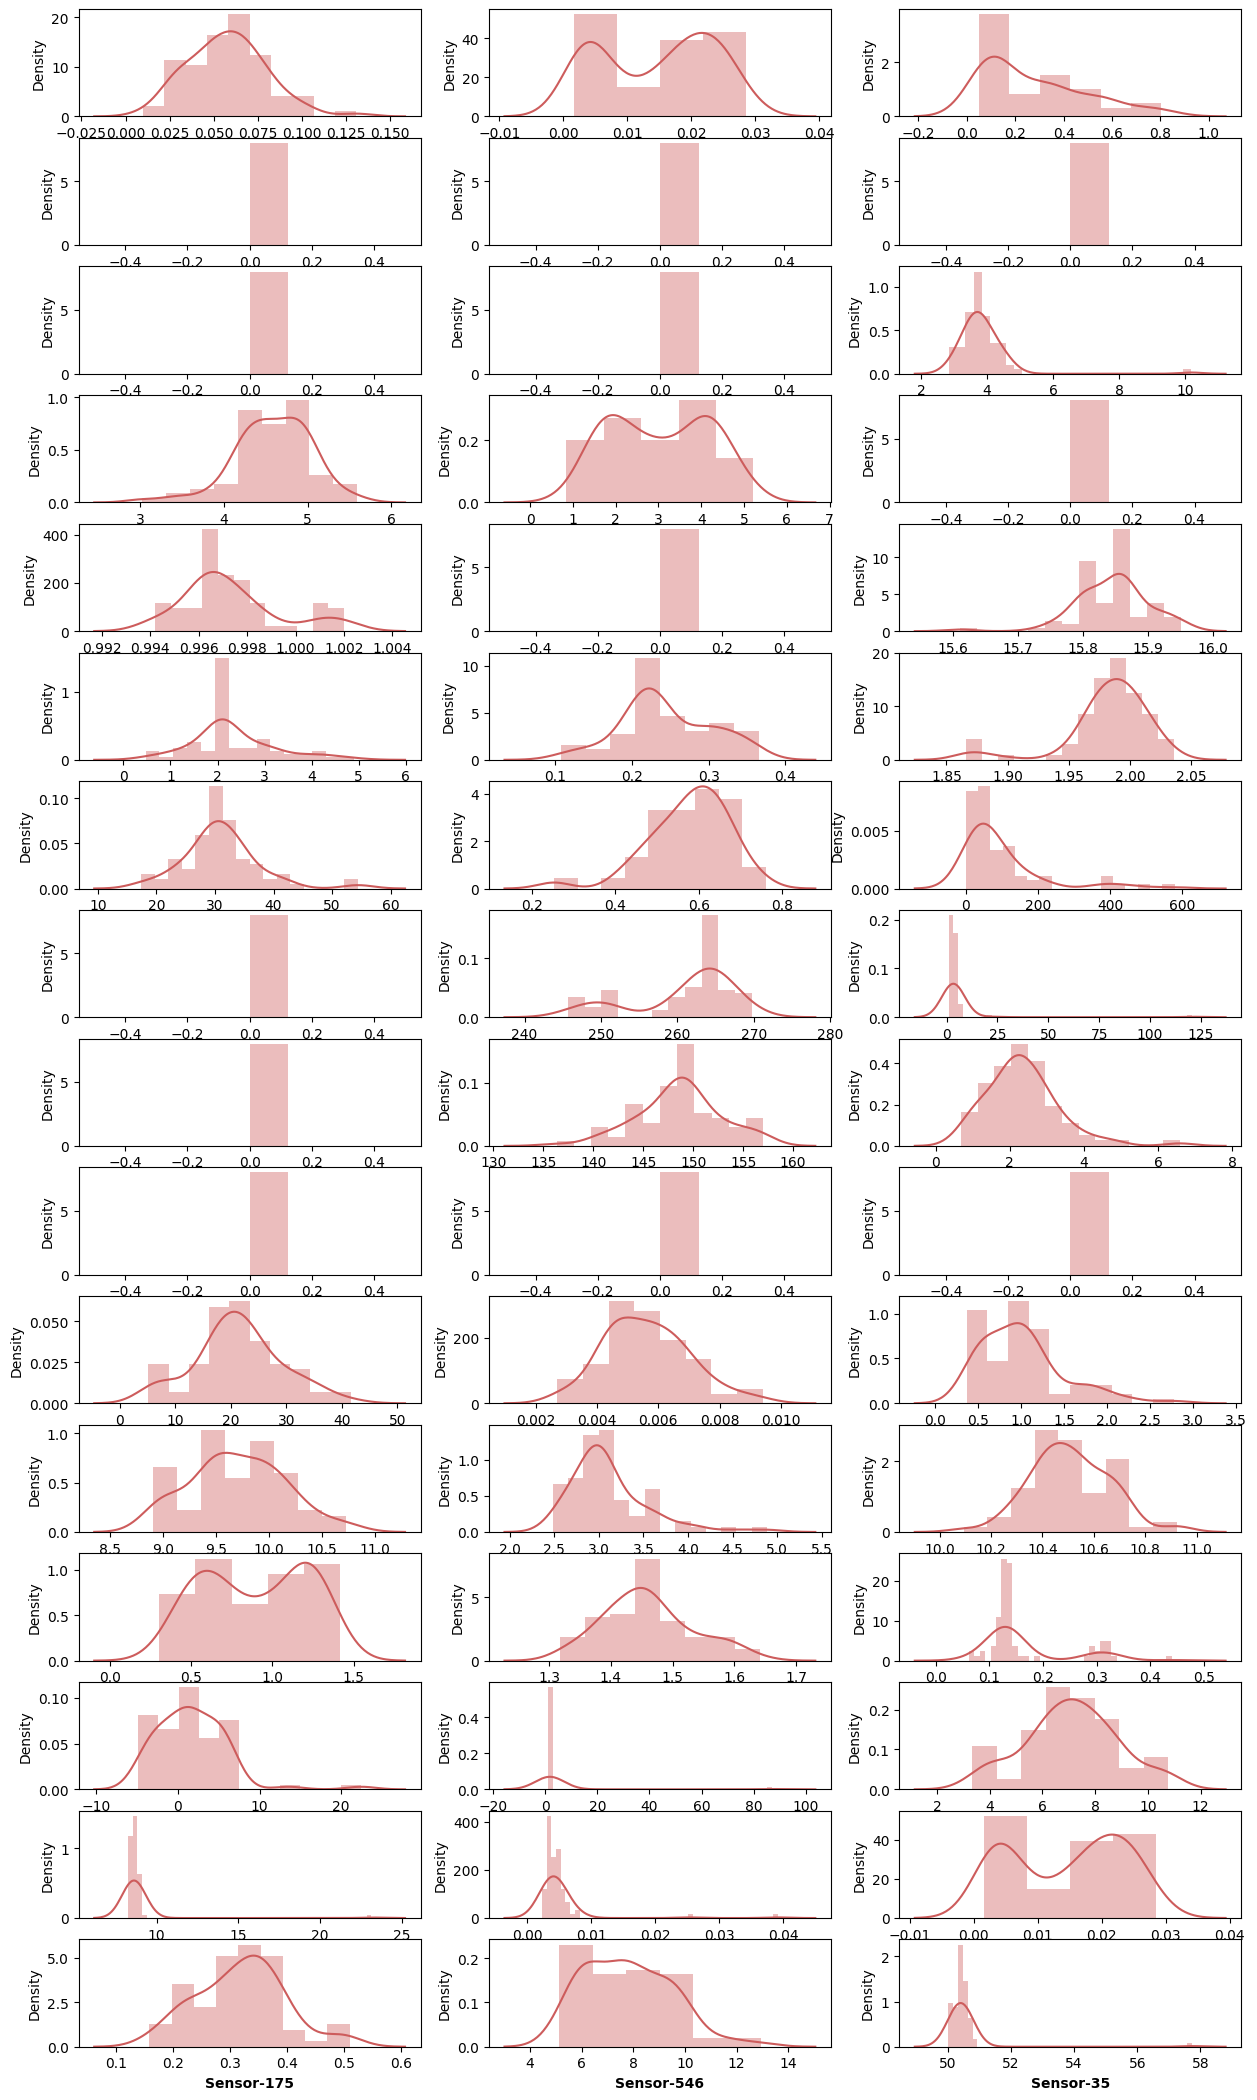

In [17]:
## Plotting Random 50 Sensors distribution

plt.figure(figsize=(15,100))

for i,col in enumerate(train_data.columns[random_50_idx]):
    plt.subplot(60,3, i+1)
    sns.distplot(x=train_data[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout


In [18]:
def get_cols_with_zero_std_dev(train_data: pd.DataFrame):
    """
    Returns a list of columns names who are having zero standard deviation.
    """
    cols_to_drop = []
    num_cols = [col for col in train_data.columns if train_data[col].dtype != 'O']  # numerical cols only
    for col in num_cols:
        if train_data[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(train_data: pd.DataFrame, missing_thresh=.7):
    """
    Returns a list of columns having missing values more than certain thresh.
    """
    cols_missing_ratios = train_data.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_thresh].index)
    return cols_to_drop        

In [19]:
cols_to_drop=get_cols_with_zero_std_dev(train_data)
cols_to_drop

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [20]:
cols_to_drop_1=get_redundant_cols(train_data,missing_thresh=.7)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [21]:
train_data.drop(cols_to_drop, axis=1,inplace=True )

In [22]:
train_data.drop(cols_to_drop_1, axis=1, inplace=True)

In [23]:
X_train = train_data.drop(columns='Good/Bad', axis=1)


In [24]:
y_train = train_data['Good/Bad']

In [25]:
test_data.drop('Unnamed: 0', axis=1, inplace=True )

In [26]:
X_test=test_data.drop('Good/Bad', axis=1)

In [27]:
y_test=test_data['Good/Bad']

In [28]:
X_train.shape

(80, 464)

In [29]:
y_train.shape

(80,)

In [30]:
X_test.shape

(20, 590)

In [31]:
y_test.shape

(20,)

## Data Transformation

In [32]:
## import necessary libraries

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [33]:
imputer=KNNImputer(n_neighbors=3)
preprocessing_pipeline=Pipeline(
    steps=[('Imputer', imputer), ('Scaler', RobustScaler())]
)
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [34]:
X_train_transformed=preprocessing_pipeline.fit_transform(X_train)

#### Shall we cluster Wafers instances?


In [35]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
## Importing necessary libraries

from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass

In [39]:
@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')

            ####################### Compute WCSS for shortlisted number of clusters ##########################
            print("computing WCSS for shortlisted number of clusters..")
            wcss = []  # Within Summation of Squares
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++',
                                random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print(
                "WCSS computed successfully for all shortlisted number of clusters!")

            ################### Finalize dispersal point as the ideal number of clusters #####################
            print(
                "Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1, 11), wcss, curve='convex', direction='decreasing')  # range(1, 11) vs WCSS
            print(
                f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e


In [40]:
## Cluster `Wafer` instances

cluster_wafers = ClusterDataInstances(X=X_train_transformed, desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of clusters to cluster "wafers features set" into..
computing WCSS for shortlisted number of clusters..


WCSS for n_clusters=1: 7157126.728067337
WCSS for n_clusters=2: 2060284.4491420726
WCSS for n_clusters=3: 1075205.8026712302
WCSS for n_clusters=4: 524733.9914493756
WCSS for n_clusters=5: 313431.52121901966
WCSS for n_clusters=6: 265239.9901782049
WCSS for n_clusters=7: 217101.65665487642
WCSS for n_clusters=8: 175578.771103086
WCSS for n_clusters=9: 143007.39601376723
WCSS for n_clusters=10: 108681.61725354884
WCSS computed successfully for all shortlisted number of clusters!
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 3
Dividing the "wafers features" instances into 3 clusters via KMeans Clustering algorithm..
..said data instances divided into 3 clusters successfully!


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.        ,
         0.75955556,  1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.51612903,
        -0.52610857,  1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ...,  0.58064516,
        -0.08775867,  1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ...,  0.12903226,
        -0.17805529,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.29032258,
         0.28421459,  1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.16129032,
        -0.20782888,  1.        ]])

In [41]:
## Clusters

np.unique(X_clus[:, -1])

array([0., 1., 2.])

In [48]:
## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y_train]

## Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(17, 466)

In [49]:
## Cluster_2 data

wafers_clus[wafers_clus[:, -2] == 1].shape

(62, 466)

In [50]:
## Cluster_3 data

wafers_clus[wafers_clus[:, -2] == 2].shape

(1, 466)

 Perhaps we were wrong about dividing the Wafers dataset into clusters, as we can see pretty much of all datapoints lie in the second cluster itself.

Let's take look at another clusters anyway.. we mustn't divide the dataset into clusters. Not a good idea!

# Resampling of Training instances

Resampling is imperative in this case as the target variable is highly imbalanced.

In [51]:
%pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.6 kB 960.0 kB/s eta 0:00:01
   --------------------------- ------------ 163.8/235.6 kB 2.0 MB/s eta 0:00:01
   --------------------------------- ------ 194.6/235.6 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from imblearn.combine import SMOTETomek

In [54]:
X, y = X_train_transformed[:, :-1], y_train
resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(X, y)

In [55]:
print("Before resampling, Shape of training instances: ", np.c_[X_train_transformed, y_train].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (80, 465)
After resampling, Shape of training instances:  (148, 464)


In [56]:
## Target Cats after Resampling

print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 74, 1: 74


In [57]:

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((80, 464), (80,))
test set: ((20, 590), (20,))


## Model Training

In [59]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

# Shortlisted base Models
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.2/99.8 MB 2.8 MB/s eta 0:00:37
   ---------------------------------------- 0.3/99.8 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 0.5/99.8 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 0.8/99.8 MB 3.3 MB/s eta 0:00:30
   ---------------------------------------- 1.0/99.8 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 1.2/99.8 MB 3.9 MB/s eta 0:00:26
    --------------------------------------- 1.4/99.8 MB 4.0 MB/s eta 0:00:25
    --------------------------------------- 1.5/99.8 MB 3.6 MB/s eta 0:00:28
    ----------------------------

In [60]:
## A function to display Scores

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [63]:
## SVC Scores

svc_scores = cross_val_score(svc_clf, X_res, y_res, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [64]:
display_scores(svc_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [67]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_preds = cross_val_predict(svc_clf, X_res, y_res, cv=5)

# AUC score
svc_auc = roc_auc_score(y_res, svc_preds)
svc_auc

0.9797297297297297

In [69]:
## SVC rbf Scores

svc_rbf_scores = cross_val_score(svc_rbf_clf, X_res, y_res, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [70]:
display_scores(svc_rbf_scores)

Scores:  [0.94642857 1.         0.85714286 0.80357143 1.         1.
 1.         0.96428571 1.         1.        ]
Mean:  0.9571428571428571
Standard Deviation:  0.06691069283998285


In [72]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_res, y_res, cv=5)

# AUC score
svc_rbf_auc = roc_auc_score(y_res, svc_rbf_preds)
svc_rbf_auc

0.6418918918918919

In [74]:
## Random Forest Scores

random_clf_scores = cross_val_score(random_clf, X_res, y_res, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   4.5s
[CV] END .................................................... total time=   1.7s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s


In [75]:
display_scores(random_clf_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [77]:

## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, X_res, y_res, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_res, random_clf_preds)
random_clf_auc

1.0

## The End